# User Engagement Analysis
- User Engagement Analysis focuses on tracking user activities on database sessions to appreciate user engagement for overall applications and per application. The engagement metrics to be used are:
    - Sessions frequency
    - Duration of the session
    - Session total traffic (download and upload in bytes)


In [1]:
# Import necessary libraries and modules
import os
import sys
import warnings
import pandas as pd

# Add parent directory to path to import local modules
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.user_engag_analysis import UserEngagementAnalysis


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and Display Cleaned Data

In [2]:
# Load the data
df = pd.read_csv('../data/clean_proccessed_data.csv')

# Display the first few rows of the DataFrame
df.head()

,Bearer Id,Start,End,Dur. (s),MSISDN/Number,IMSI,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),...,Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Handset Type,DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,1823652.0,3.366496e+10,2.082014e+14,3.552121e+13,23.0,44.0,42.000000,...,171744450.0,8814393.0,308879636.0,36749741.0,Samsung,Samsung Galaxy A5 Sm-A520F,100.0,0.0,100.0,0.0
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,1365104.0,3.368185e+10,2.082019e+14,3.579401e+13,16.0,26.0,65.000000,...,526904238.0,15055145.0,653384965.0,53800391.0,Samsung,Samsung Galaxy J5 (Sm-J530),100.0,0.0,100.0,0.0
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,1361762.0,3.376063e+10,2.082003e+14,3.528151e+13,6.0,9.0,109.795706,...,410692588.0,4215763.0,279807335.0,27883638.0,Samsung,Samsung Galaxy A8 (2018),100.0,0.0,100.0,0.0
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,1321509.0,3.375034e+10,2.082014e+14,3.535661e+13,44.0,44.0,109.795706,...,749039933.0,12797283.0,846028530.0,43324218.0,undefined,undefined,100.0,0.0,100.0,0.0
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,1089009.0,3.369980e+10,2.082014e+14,3.540701e+13,6.0,9.0,109.795706,...,550709500.0,13910322.0,569138589.0,38542814.0,Samsung,Samsung Sm-G390F,100.0,0.0,100.0,0.0


### User Engagement Analysis Initialization

In [3]:
User_Engag = UserEngagementAnalysis(df)

In [4]:
aggregated_data= User_Engag.aggregate_metrics_per_customer()
print(aggregated_data.head())

   MSISDN/Number  session_frequency  session_duration  total_traffic
0   3.360100e+10                  1          116720.0   8.786906e+08
1   3.360100e+10                  1          181230.0   1.568596e+08
2   3.360100e+10                  1          134969.0   5.959665e+08
3   3.360101e+10                  1           49878.0   4.223207e+08
4   3.360101e+10                  4           37104.0   1.457411e+09


### Aggregated Metrics per Customer

In [5]:
top_10_frequency, top_10_duration, top_10_traffic = User_Engag.top_10_customers_per_metric(aggregated_data)

In [6]:
top_10_frequency

('top_10_frequency',
         MSISDN/Number  session_frequency  session_duration  total_traffic
 106853   4.188282e+10            1136356      7.255100e+07   5.317447e+11
 13526    3.362632e+10                324      8.791927e+06   7.971167e+09
 6437     3.361489e+10                289      9.966898e+06   8.846226e+09
 13180    3.362578e+10                289      1.855375e+07   8.499621e+09
 37052    3.365973e+10                256      4.035428e+06   7.705863e+09
 76363    3.367588e+10                225      4.865947e+06   7.891111e+09
 92923    3.376054e+10                225      9.279434e+06   8.514774e+09
 65118    3.366716e+10                169      8.744914e+06   5.618394e+09
 666      3.360313e+10                144      6.287761e+06   4.976195e+09
 1279     3.360452e+10                144      5.207990e+06   5.487855e+09)

In [7]:
top_10_duration

('top_10_duration',
         MSISDN/Number  session_frequency  session_duration  total_traffic
 106853   4.188282e+10            1136356      7.255100e+07   5.317447e+11
 13180    3.362578e+10                289      1.855375e+07   8.499621e+09
 6437     3.361489e+10                289      9.966898e+06   8.846226e+09
 92923    3.376054e+10                225      9.279434e+06   8.514774e+09
 13526    3.362632e+10                324      8.791927e+06   7.971167e+09
 65118    3.366716e+10                169      8.744914e+06   5.618394e+09
 50281    3.366284e+10                 81      6.614270e+06   4.000098e+09
 57160    3.366469e+10                 81      6.288730e+06   5.682007e+09
 666      3.360313e+10                144      6.287761e+06   4.976195e+09
 66029    3.366746e+10                 36      5.649882e+06   2.600522e+09)

In [8]:
top_10_traffic

('top_10_traffic',
         MSISDN/Number  session_frequency  session_duration  total_traffic
 106853   4.188282e+10            1136356      7.255100e+07   5.317447e+11
 6437     3.361489e+10                289      9.966898e+06   8.846226e+09
 92923    3.376054e+10                225      9.279434e+06   8.514774e+09
 13180    3.362578e+10                289      1.855375e+07   8.499621e+09
 13526    3.362632e+10                324      8.791927e+06   7.971167e+09
 76363    3.367588e+10                225      4.865947e+06   7.891111e+09
 37052    3.365973e+10                256      4.035428e+06   7.705863e+09
 63028    3.366646e+10                121      4.536757e+06   7.308501e+09
 92577    3.376041e+10                144      5.321667e+06   7.132371e+09
 57241    3.366471e+10                121      2.927785e+06   6.872018e+09)

### Top 10 Customers by Session Frequency

Key insights include:

- **High Session Frequency**: The customer with MSISDN/Number `4.188282e+10` has an exceptionally high session frequency of 1,136,356 sessions, indicating very frequent usage.
- **Session Duration**: Despite the high session frequency, the session duration varies significantly among the top customers. For example, the top customer has a total session duration of `7.255100e+07` seconds, while others have much lower durations.
- **Total Traffic**: The total traffic (download and upload in bytes) also varies, with the top customer generating `5.317447e+11` bytes of traffic, which is significantly higher than others.

This analysis helps identify the most engaged users in terms of session frequency, which can be useful for targeted marketing and improving user experience.

### Top 10 Customers by Session Duration

Key insights include:

- **Longest Session Duration**: The customer with MSISDN/Number `4.188282e+10` has an exceptionally long session duration of `7.255100e+07` seconds, indicating very high engagement.
- **Session Frequency**: Despite the long session duration, the session frequency varies among the top customers. For example, the top customer has a session frequency of 1,136,356 sessions, while others have much lower frequencies.
- **Total Traffic**: The total traffic (download and upload in bytes) also varies, with the top customer generating `5.317447e+11` bytes of traffic, which is significantly higher than others.

This analysis helps identify the most engaged users in terms of session duration, which can be useful for understanding user behavior and improving user experience.

### Top 10 Customers by Total Traffic

Key insights include:

- **Highest Total Traffic**: The customer with MSISDN/Number `4.188282e+10` has an exceptionally high total traffic of `5.317447e+11` bytes, indicating very high data usage.
- **Session Frequency**: The session frequency varies among the top customers. For example, the top customer has a session frequency of 1,136,356 sessions, while others have much lower frequencies.
- **Session Duration**: The session duration also varies significantly among the top customers. For example, the top customer has a session duration of `7.255100e+07` seconds, while others have much lower durations.

This analysis helps identify the most data-intensive users, which can be useful for network optimization and targeted marketing strategies.


### Normalize user engagement metrics by scaling values between 0-1

In [9]:
normalized_data = User_Engag.normalize_metrics(aggregated_data)

In [10]:
normalized_data

array([[-0.0035172 , -0.10407105,  0.10768568],
       [-0.0035172 ,  0.11878972, -0.31763388],
       [-0.0035172 , -0.04102677, -0.05890193],
       ...,
       [-0.0035172 ,  2.52377555, -0.27328639],
       [-0.0035172 ,  0.36683503, -0.05871258],
       [-0.0035172 ,  2.49772389, -0.32806667]], shape=(106857, 3))


### This appears to be a numpy array containing 106,857 rows of 3D coordinate data
 Notable characteristics:
 - First column is constant (-0.0035172) suggesting a fixed offset or baseline
 - Second/third columns show significant variation (e.g. 2.52, -0.32) 
 - Data likely represents 3D point cloud, motion capture, or spatial coordinates
 - Shape (106857, 3) indicates large number of 3D points or time series samples

In [11]:
clusters = User_Engag.k_means_clustering(normalized_data)

In [12]:
clusters

array([2, 2, 2, ..., 0, 2, 0], shape=(106857,), dtype=int32)

In [13]:
cluster_metrics = User_Engag.compute_cluster_metrics(aggregated_data, clusters)

In [14]:
cluster_metrics

session_frequency                                 session_duration  \
                      min      max          mean      sum              min   
cluster                                                                      
0                       1      324  1.248840e+01    97959     1.706800e+05   
1                 1136356  1136356  1.136356e+06  1136356     7.255100e+07   
2                       1       36  1.808326e+00   179046     7.142000e+03   

                                                  total_traffic                \
                  max          mean           sum           min           max   
cluster                                                                         
0        1.855375e+07  5.373273e+05  4.214795e+09  5.212838e+07  8.846226e+09   
1        7.255100e+07  7.255100e+07  7.255100e+07  5.317447e+11  5.317447e+11   
2        3.997920e+05  1.151784e+05  1.140404e+10  3.324901e+07  3.271920e+09   

                                     
                 mean           sum  
cluster                              
0        1.646749e+09  1.291710e+13  
1        5.317447e+11  5.317447e+11  
2        6.152421e+08  6.091635e+13

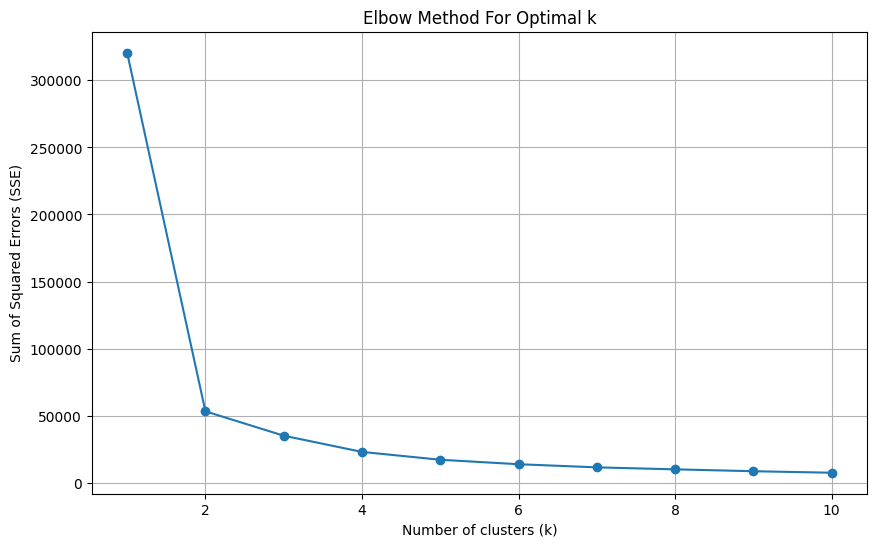

In [15]:
User_Engag.plot_elbow_method(normalized_data)

In [16]:
app_traffic = User_Engag.aggregate_traffic_per_application()

In [17]:
app_traffic

,application,MSISDN/Number,traffic
0,Email DL (Bytes),3.360100e+10,8.374000e+05
1,Email DL (Bytes),3.360100e+10,2.828821e+06
2,Email DL (Bytes),3.360100e+10,2.436500e+06
3,Email DL (Bytes),3.360101e+10,2.178618e+06
4,Email DL (Bytes),3.360101e+10,2.247808e+06
...,...,...,...
1495993,Youtube UL (Bytes),3.379000e+10,1.425471e+07
1495994,Youtube UL (Bytes),4.188282e+10,1.184609e+10
1495995,Youtube UL (Bytes),3.197021e+12,2.120016e+06
1495996,Youtube UL (Bytes),3.370000e+14,2.004421e+07


In [18]:
top_10_users = User_Engag.top_10_users_per_application(app_traffic)

In [19]:
top_10_users.head(10)

,application,MSISDN/Number,traffic
0,Email DL (Bytes),4.188282e+10,1.904048e+09
1,Email DL (Bytes),3.361489e+10,3.360721e+07
2,Email DL (Bytes),3.362632e+10,3.340478e+07
3,Email DL (Bytes),3.362578e+10,3.189541e+07
4,Email DL (Bytes),3.378632e+10,3.087691e+07
5,Email DL (Bytes),3.365973e+10,2.990765e+07
6,Email DL (Bytes),3.376054e+10,2.643790e+07
7,Email DL (Bytes),3.366546e+10,2.594287e+07
8,Email DL (Bytes),3.367588e+10,2.428472e+07
9,Email DL (Bytes),3.369879e+10,2.416560e+07



### Analysis of Email Download (DL) Bytes traffic pattern:

 1. Initial spike in traffic at index 0 (4.19e+10 bytes) followed by sharp drop
 2. Traffic stabilizes around 3.36-3.38e+10 bytes from index 1-9
 3. Declining trend in variation (bytes) from 1.90e+09 to 2.42e+07
 4. Most stable period appears to be between indices 7-9
 5. Overall pattern suggests initial heavy usage followed by normalization
 6. Variations decrease over time indicating more consistent usage patterns

Top 3 most used applications with values: {'Gaming DL (Bytes)': 63307127434008.59, 'Other DL (Bytes)': 63165502729718.195, 'Youtube DL (Bytes)': 1745122509657.504}


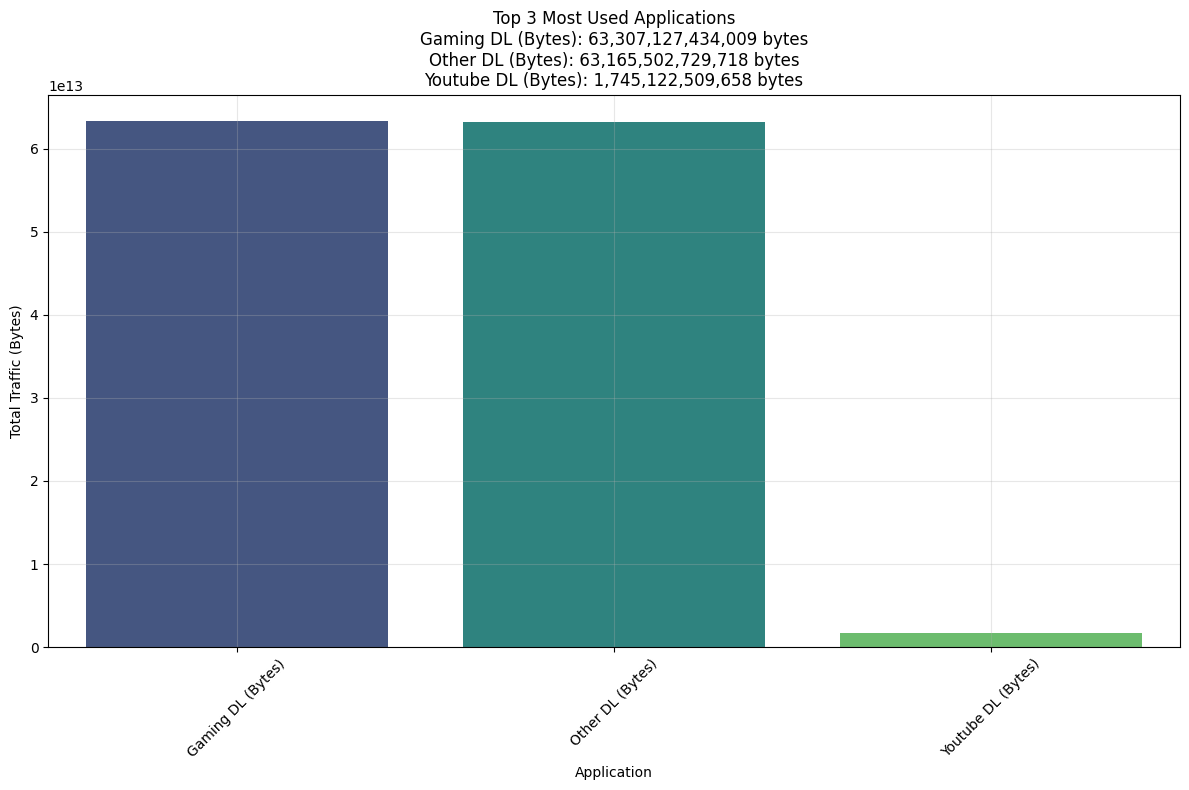

In [20]:
User_Engag.plot_top_3_applications(app_traffic)

### Key Insights:

 1. 🎮 Gaming Applications Dominance
 - Gaming leads data consumption with ~63.3 PB (Petabytes)
 - Indicates heavy gaming traffic on the network 
 - May require optimization for gaming-specific traffic

 2. 📱 Other Applications Close Second
 - "Other" category consumes ~63.2 PB
 - Nearly equal to gaming traffic
 - Suggests need for detailed traffic classification

 3. 📺 YouTube Usage Significantly Lower
 - YouTube traffic at ~1.7 PB
 - Much lower than gaming/other categories
 - Represents only ~1.4% of top 3 applications' total traffic

 4. 🔧 Network Planning Implications
 - Network capacity should prioritize gaming traffic
 - Consider gaming-specific QoS policies
 - Investigate "Other" category for better classification